In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Data Set Description




# Description

In [6]:
#Inputs the data set
tips = sns.load_dataset("tips")


In [7]:
#Print first five lines
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
#Prints last five lines
tips.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
#Utilise descriptive statistics
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


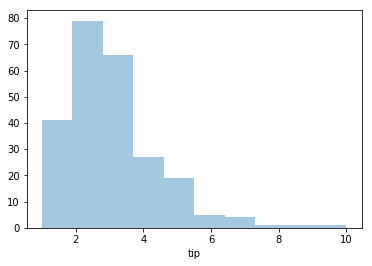

In [11]:
#Looking at a univariate distribution seaborn using the distplot() function. A histogram devised, a kernel density estimate (KDE) produced. We 
#Adapted https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.distplot(tips['tip'], kde=False, bins=10)

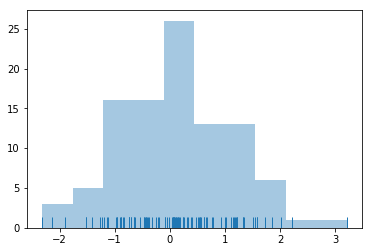

In [13]:
#A histogram will show the distribution of data by utilising bins and rugs which draw bars at points along to highlight the individual number of conclusions.
#Adapted from https://seaborn.pydata.org/tutorial/distributions.html
#sns.distplot(x, kde=False, rug=True)

In [15]:
#Obtains more information of the data type for each variable in our dataset
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [22]:
#Obtains the mean and median of the total_bill
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
av= tips['tip'].mean()
print(av)

2.9982786885245902


In [23]:
medium = tips['tip'].median()
print(medium)

2.9


In [24]:
#Obtains and prints the standard deviation of the total_bill, which shows how the values deviate out form their mean.
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
stand_dev = tips['tip'].std()
print(stand_dev)

1.3836381890011826


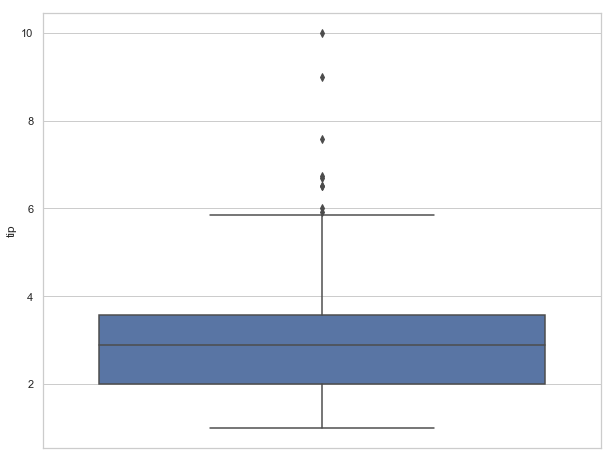

In [44]:
#
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='tip', data=tips, orient="v")

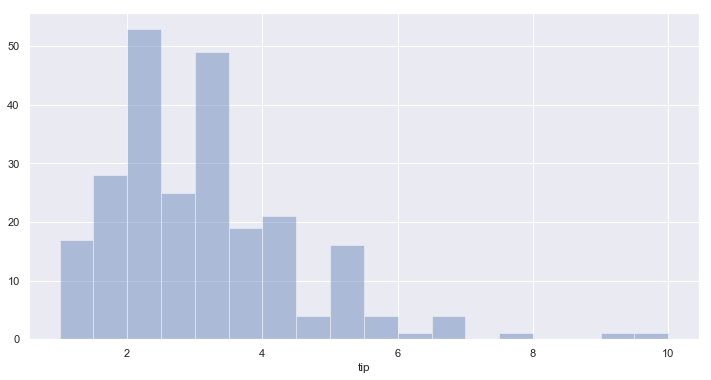

In [48]:
show_data = tips.dropna(subset=['tip'])
plt.figure(figsize=(12, 6))
sns.distplot(show_data['tip'], kde=False)

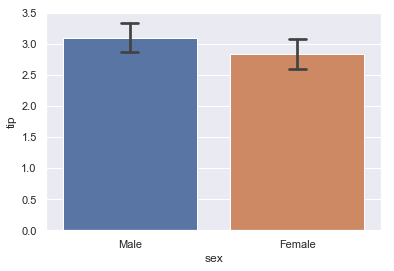

In [70]:
#A bar plot shows an assessment of central tendency in a numeric variable with the height of each rectangle and shows some of the uncertainty regarding estimates utilising error bars.
#Adapted from https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x= 'sex', y= 'tip', data = tips, capsize=.1)

# Regression

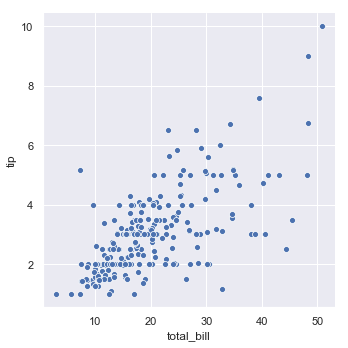

In [52]:
#Relplot allows us to draw a scatterplot comparing the variables of tips according to total_bill and informs if there is a relationship of these variables
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.relplot(x="total_bill", y="tip", data=tips)

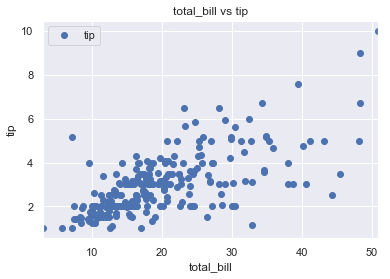

In [54]:
#plotting the data on a 2Dgraph to display the relationship between the variables
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
tips.plot(x='total_bill', y='tip', style='o')  
plt.title('total_bill vs tip')  
plt.xlabel('total_bill')  
plt.ylabel('tip')  
plt.show()

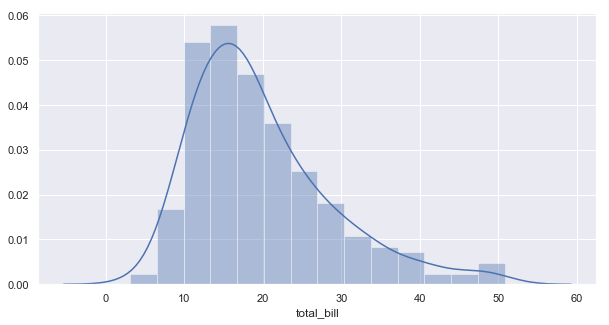

In [57]:
#plotting the average max total_bill
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(tips['total_bill'])